In [6]:
import sys
!conda install --yes --prefix {sys.prefix} cartopy 
import os
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import numpy as np
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs


Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/alr4786/.conda/envs/my-env:
#
cartopy                   0.17.0           py36hbb7e04d_1  


In [7]:
dataset = '/projects/b1045/cmip/CMIP5/NCL_Practice/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc'

View the metadata for the dataset

In [8]:
dset = xr.open_dataset(dataset)
print(NC.variables.keys())
#print(dset)

NameError: name 'NC' is not defined

View the temperature metadata 

In [ ]:
print(NC['tas'])

In [10]:
feb = dset.sel(time=slice('2066-02-01','2066-02-28'))
feb_av = feb.mean(dim = 'time')

# Temperatures in Celcius 
celc = feb_av['tas']-273

lat = feb_av.lat
lon = feb_av.lon
tas = feb_av.tas

In [24]:
#Projection for plot
projection= ccrs.PlateCarree(central_longitude=255);
# Data projection  -- these are different!
data_crs = ccrs.PlateCarree()

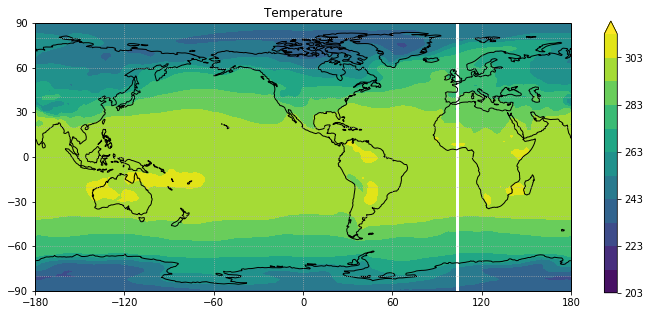

In [27]:
%matplotlib inline
fig = plt.figure(figsize=[12,5])

# Plate Carree Projection 
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()


cf = ax.contourf(lon, lat, tas,
                       levels=np.arange(203, 323, 10),
                       extend='max',
                       transform=data_crs,
                       cbar_kwargs={'label': dset.tas.units})
plt.colorbar(cf)

# Add the gridlines, title, colorbar
ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs= projection)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs= projection)
ax.gridlines(crs=projection,linestyle="dotted")
plt.title("Temperature")

plt.show()

In [26]:
# Funky Projection 
projection2 = ccrs.Gnomonic(central_longitude=180)
#Data Projeciton 
data_crs2 = ccrs.Gnomonic()

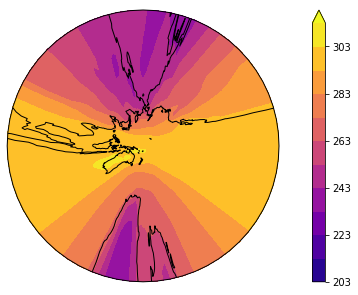

In [31]:
%matplotlib inline
fig = plt.figure(figsize=[12,5])

ax2 = plt.axes(projection= projection2)
ax2.set_global()
ax2.coastlines()

cf2 = ax2.contourf(lon, lat, tas,
             levels=np.arange(203, 323, 10),
                       extend='max',
                       transform=data_crs,
                       cbar_kwargs={'label': dset.tas.units}, 
                  cmap = 'plasma')
plt.colorbar(cf2)